# Evolução de um ecossistema via modelo generalizado de Lotka-Volterra

- PET - Física
- Ex-Petiano: Gabriel Wendell Celestino Rocha
- Data: 23 de Junho de 2023

O objetivo deste `Notebook` é simular computacionalmente a evolução de um ecossistema utilizando o modelo generalizado de Lotka-Volterra (gLV) através dos métodos apresentados em May, R. **[8]** e Allesina, S., e Tang, S. **[15]**. O modelo generalizado de Lotka-Volterra visa apresentar um conjunto de equações matemáticas que generalizem a relação predador-presa em sistemas biológicos do tipo Lotka-Volterra.

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em **2** seções:

1. **Introdução teórica**
2. **Modelos e Métodos.**

## Pré-requisitos

Este `Notebook` assume que o leitor esteja familiarizado com o formulação do modelo de Lotka-Volterra. Dessa forma, é recomendável que o leitor tenha ao menos estudado o Notebook [Explorando o modelo generalizado de Lotka-Volterra](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Explorando%20o%20modelo%20generalizado%20de%20Lotka-Volterra.ipynb) **[1]** que é de vital importância para o que será estudado aqui, uma vez que aqui adotaremos uma metodolia "direta ao ponto". Diante disso, é de suma importância que o leitor tenha conhecimento ao menos intermediário do modelo generalizado de Lotka-Volterra. Além disso, recomenda-se fortemente que o leitor estude os artigos de May, R. **[8]** e Allesina, S., and Tang, S. **[15]** cujos modelos estão sendo explorados e implementados aqui. Além disso, o presente `Notebook` foi desenvolvido e escrito tendo em mente estudantes de graduação em Física ou Matemática que estejam desenvolvendo pesquisa (IC pelo menos) na área de Sistemas Dinâmicos aplicado em sistemas biológicos.

### Importando as bibliotecas

In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19044
Matplotlib 3.6.0
Numpy 1.21.6
Fri Apr 21 19:22:30 2023 Hora Padrão de Buenos Aires

---

## 1. Introdução teórica

Capturar e quantificar o comportamento de sistemas em evolução é um desafio único na Biologia-Matemática. No campo da dinâmica evolutiva, as populações constituídas por organismos são as menores unidades em evolução **[2]**. O processo evolutivo prossegue pela aquisição aleatória de novas mutações. Este mutante está então sujeito às forças da seleção natural e à deriva aleatória. Se a mutação for vantajosa para o organismo, então a seleção favorecerá seu estabelecimento, enquanto o oposto é verdadeiro para mutações desvantajosas. No entanto, nenhum resultado determinístico é garantido, pois fatores aleatórios podem eliminar o mutante.

### 1.1 Modelos para o processo evolutivo

Muitas abordagens formais bem-sucedidas dentro do campo enquadram a evolução de um único organismo como seleção natural agindo apenas na população mista do precursor do tipo selvagem e um novo mutante. O *processo de Moran* é uma dessas abordagens **[3]**. O processo é uma cadeia de Markov de tempo discreto na qual um único indivíduo mutante surge e compete com sua fonte ou população precursora. A cada intervalo de tempo, um indivíduo é escolhido para reprodução e um indivíduo é escolhido para morte, com probabilidades proporcionais ao tamanho relativo da população. É importante ressaltar que esse modelo pode prever analiticamente a probabilidade de que o mutante ultrapasse a população de origem inicial ou a probabilidade de fixação. Esta quantidade é particularmente importante, pois quantifica a taxa de evolução (para mais detalhes, consulte os artigos de Desai, Fisher $\&$ Murray **[4]** e Kimura **[5]**). Para aptidão relativa do mutante $r$, a probabilidade de fixação $p$ é:

$$
p=\frac{1-\frac{1}{r}}{1-\frac{1}{r^{N}}}=\frac{r-1}{r}\cdot\frac{r^{N}}{r^{N}-1}=\left(r-1\right)\cdot\frac{r^{N-1}}{\left(r-1\right)\left(r^{N-1}+r^{N-2}+\ldots+1\right)}\quad\therefore
$$

$$\tag{1.1}
\therefore\quad\boxed{p=r^{N-1}\cdot\left[\sum_{k=1}^{N}r^{N-k}\right]^{-1}}
$$

$\blacksquare$

Uma grande quantidade de trabalho foi feita para estender as ideias centrais do processo de Moran a qualquer estrutura populacional arbitrária por meio da teoria dos grafos evolutivos (consulte os artigos de Lieberman, Hauert $\&$ Nowak 2005 **[6]** e Tkadlec, Pavlogiannis,  Chatterjee $\&$ Nowak 2021 **[7]** para mais detalhes), na qual os organismos são representados por vértices e suas interações por arestas. Embora essas ferramentas sejam úteis para considerar um organismo no vácuo, as espécies naturais interagem com uma variedade de outros organismos em ecossistemas complexos (May, R. 1988 **[8]**). Como tal, é imperativo estender os modelos existentes para encapsular as interações de espécies reais para testar os efeitos na probabilidade de fixação, bem como para determinar se os mesmos princípios orientadores continuam a se aplicar ou devem ser revisados com a introdução da complexidade.

### 1.2 Interação entre espécies com o modelo Lotka-Volterra

O modelo Lotka-Volterra é um modelo de Equação Diferencial Ordinária (EDO) que é usado para descrever a dinâmica predador-presa em um ambiente isolado (as duas espécies são as únicas espécies presentes) e foi apresentado originalmente nos trabalhos de Lotka (1920) **[9]** e Volterra (1931) **[10]**. Tomando $x$ para ser a população da presa e $y$ para a população do predador, o modelo é tipicamente apresentado como:

$$\tag{1.2}
\frac{\text{d}x}{\text{d}t}=\alpha x-\beta xy\quad\wedge\quad\frac{\text{d}y}{\text{d}y}=\delta xy-\gamma y\quad.
$$

O modelo pode ser generalizado para encapsular as interações de um total de espécies $S$ com uma matriz de interação $\boldsymbol{A}$ que descreve o impacto que cada espécie tem sobre as outras espécies e um vetor $\boldsymbol{r}$ de taxas de crescimento intrínsecas para cada espécie na ausência de outras espécies. Uma formulação comum das equações generalizadas é considerar $\boldsymbol{x}(t)$ as densidades de cada uma das espécies. O modelo generalizado pode ser resumido como descrito em Allesina (2020) **[11]**:

$$\tag{1.3}
\frac{\text{d}\boldsymbol{x}(t)}{\text{d}t}=D\left[\boldsymbol{x}\left(t\right)\right]\left[\boldsymbol{r}+\boldsymbol{A}\boldsymbol{x}\left(t\right)\right]\quad,
$$

onde $D$ representa a diagonal da matriz de interação $\boldsymbol{A}$.

Embora o modelo generalizado de Lotka-Volterra (gLV, do inglês *generalized Lotka-Volterra*) possa capturar adequadamente uma ampla variedade de dinâmicas para muitas espécies que interagem (consulte os artigos de Hirsch 1982 **[12]** e Smale 1976 **[13]**), o modelo assume inerentemente que a matriz de interação é estática e, portanto, que as populações não evoluem. Embora essa suposição simplificadora possa ser útil para estudar populações no presente, os mutantes podem surgir e alterar o estado de um ecossistema com interações apenas ligeiramente perturbadas em comparação com sua fonte de tipo selvagem. Ao reunir as duas ideias-chave nesses modelos separados, propomos um modelo que captura a evolução como o processo Moran e considera as interações entre todas as espécies dentro do ambiente por meio do modelo gLV.

---

## 2. Modelos e Métodos

### 2.1 Modelo de Lotka-Volterra generalizado estocástico com evolução

Vamos abordar o modelo gLV sob uma estrutura estocástica, modelando ecossistemas como um processo Moran multi-espécies, população fixa e tempo contínuo. Este processo particular é um subconjunto de cadeias de Markov de tempo contínuo (CTMCs, do inglês *Continuous-Time Markov Chains*) chamado processo de nascimento-morte para cada espécie individual, em que um indivíduo de uma única espécie é escolhido para replicar proporcionalmente à taxa de natalidade ajustada por espécies em interação e outro indivíduo de uma espécie espécies diferentes – para manter este sistema como um CTMC – é escolhido para perecer proporcionalmente à taxa de mortalidade ajustada por espécies em interação. As taxas intrínsecas de nascimento e morte de cada espécie são moduladas de acordo com uma matriz de interação, ou matriz de comunidade ecológica. Os efeitos positivos de uma espécie para outra aumentam a taxa de natalidade de uma espécie, enquanto os efeitos negativos aumentam a taxa de mortalidade de uma espécie.

Para considerar a evolução como em um processo clássico de Moran, um mutante de uma única espécie de interesse é introduzido no ecossistema no tempo $t=0$. A taxa intrínseca de nascimento e morte e os parâmetros de interação interespécies são gerados perturbando os parâmetros relevantes do ambiente selvagem. tipo como descrito abaixo. Em suma, pretendemos criar uma cópia altamente correlacionada, mas ruidosa, da espécie selvagem, capturando um mutante realista. Definindo aptidão como a diferença entre as taxas de nascimento e morte, podemos comparar a aptidão relativa do tipo selvagem e das espécies mutantes de interesse e usar os resultados analíticos do processo de Moran para derivar uma probabilidade de fixação teórica para o mutante na ausência de interação espécies. Em seguida, simulamos o modelo gLV muitas vezes, conforme descrito abaixo, até que as espécies selvagens ou mutantes de interesse sejam fixadas e, em seguida, estimamos a probabilidade de fixação do mutante a partir dessas trajetórias.

### 2.2 Gerando parâmetros de taxa de natalidade e mortalidade

Cada espécie no modelo tem uma taxa intrínseca de nascimento e morte, ambas extraídas independentemente de uma distribuição Semi-normal com variância unitária; ou seja, a taxa de natalidade $b$ e a taxa de mortalidade $d$ são amostradas da seguinte forma:

$$\tag{2.1}
\left(b,d\right)\propto\big(\left|Z_{1}\right|,\left|Z_{2}\right|\big)\text{ ,}\quad\text{onde}: \quad Z_{1},Z_{2}\stackrel{\text{i.i.d}}{\propto}\mathcal{N}\left(0,1\right)\quad.
$$

Para codificar esse modelo definimos uma função que gera as taxas de nascimento $b$ e morte $d$, que por sua vez são indistinguíveis e identicamente distribuídas, segundo a distribuição apresentada em $(2.1)$:

Para gerar as taxas de nascimento e morte do mutante, duas perturbações independentes são extraídas de uma distribuição uniforme em $[-0.1, 0.1]$, produzindo taxas de nascimento e morte altamente correlacionadas, mas ligeiramente alteradas, para as espécies selvagens e mutantes de interesse. Com base na distribuição meia-normal inicial, aproximadamente $95\%$ dos sorteios caem abaixo de $2$, portanto, consideramos o intervalo escolhido considerável e razoável para perturbação. Para contabilizar possíveis taxas de nascimento e morte perturbadas menores que $0$, usamos o máximo do valor perturbado e $0$, então $b_{\text{mutante}}=\max{\{0, b_{\text{tipo-selvagem}}\}}$ e $d_{\text{mutante}}=\max{\{0, d_{\text{tipo-selvagem}}\}}$.

$$\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond$$

- **Taxas de natalidade e mortalidade**

In [3]:
def generate_birth_death_rates(
        S: int, 
        seed: int
    ): 
    '''
    Gere um par de taxas positivas de nascimento e morte para cada espécie
    
    Parâmetros: 
    -----------
    - int S: número total de espécies; o número de nascimentos e taxas de mortalidade para gerar
    - int seed: inteiro de semente aleatória
    
    Retorna: 
    --------
    - np.array: matriz de taxas de nascimento (coluna 1) e morte (coluna 2) para cada espécie 
    (shape: (S, 2))
    '''

    # Define um objeto rng
    rng = default_rng(seed)

    return np.abs(rng.normal(loc = 0, scale = 1, size = (S, 2)))

- **Taxa de natalidade e mortalidade para os mutantes**

In [4]:
def mutant_birth_death_rate(
        birth_death: np.array, 
        seed: int
    ): 
    '''
    Perturbe as taxas de natalidade e mortalidade dadas a partir de sorteios de uma 
    distribuição uniforme no intervalo [-0,1, 0,1]
    
    Parâmetros: 
    -----------
    - np.array birth_death: taxas de nascimento e morte das espécies de interesse; 
    taxas de natalidade e mortalidade serão perturbadas 
    - int seed: inteiro de semente aleatória
    
    Retorna: 
    --------
    - np.array: matriz de taxas perturbadas de nascimento e morte para as 
    espécies mutantes de interesse (shape: (1, 2))
    '''

    # Define a rng object
    rng = default_rng(seed)

    return birth_death + rng.uniform(low = -0.1, high = 0.1, size = (1,2))

- **Gráfico das taxas de natalidade e mortalidade**

In [5]:
def plot_birth_death_rates(
        birth_rates: np.array, 
        death_rates: np.array
    ): 
    '''
    Traça as taxas de nascimento e morte para todas as espécies e espécies 
    mutantes de interesse
    
    Parâmetros: 
    -----------
    np.array birth_rates - taxas de natalidade de cada uma das espécies
    np.array death_rates - taxas de mortalidade de cada uma das espécies 
    
    Retorna: 
    --------
    None
    '''

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

    ax.plot(np.arange(birth_rates.shape[0]), birth_rates, '^-', color = 'blue', label = "Taxas de natalidade")
    ax.plot(np.arange(death_rates.shape[0]), death_rates, 'o-', color = 'red', label = "Taxas de mortalidade")

    tick_labels = np.array(
        [
            f"S{i+1}" if i != birth_rates.shape[0] - 1 else f"S{i}*" \
            for i in np.arange(birth_rates.shape[0])
        ])

    ax.set_title("Taxa de Nascimento/Morte de Espécies", fontsize = 15)
    ax.set_xlabel("Espécies", fontsize = 15)
    ax.set_ylabel("Taxa de Nascimento/Morte", fontsize = 15)
    ax.set_xticks(np.arange(birth_rates.shape[0]))
    rate_max = np.max(np.hstack([birth_rates, death_rates]))
    ax.set_yticks(np.arange(0, (rate_max // 0.2 + 1) * 0.2 + 0.1, 0.2))
    ax.set_xticklabels(tick_labels, fontsize = 20, rotation = "vertical")
    ax.set_yticklabels(np.round(ax.get_yticks(), 2), fontsize = 20)

    ax.legend(loc = 'best')
    opt_plot()
    plt.show()

$$\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond$$

-  Gráfico de exemplo das taxas de nascimento e mortalidade de espécies de tipo selvagem, mutantes e periféricas:

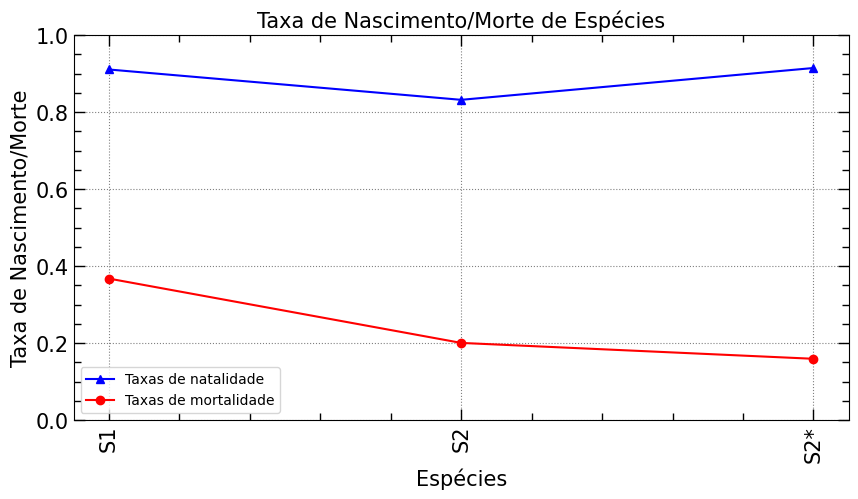

In [6]:
seed = 9411
S = 2


birth_death_rates = generate_birth_death_rates(S = S, seed = seed)
mutant_birth_death = mutant_birth_death_rate(birth_death = birth_death_rates[-1, :], seed = seed)
birth_death_rates = np.vstack([birth_death_rates, mutant_birth_death])


plot_birth_death_rates(
    birth_rates = birth_death_rates[:,0], 
    death_rates = birth_death_rates[:,1])

### 2.3 Gerando parâmetros de interação entre espécies

Geramos os parâmetros da matriz de interação entre espécies usando dois métodos com seu próprio conjunto de suposições. O primeiro método desenvolvido por May (1972) **[14]** assume que todas as interações interespécies são independentes umas das outras. Isso implica que o efeito da espécie $A$ na espécie $B$ é independente do efeito da espécie $B$ na espécie $A$, assim como o efeito da espécie $A$ na espécie $B$ é independente do efeito da espécie $C$ na espécie $D$. Devido à estrutura de independência , a matriz de interação não é necessariamente simétrica. Cada um dos parâmetros de interação é extraído de uma distribuição Normal padrão, para a qual existem parâmetros $S(S − 1)$.

O segundo método desenvolvido por Allesina $\&$ Tang (2012) assume que existe uma dependência entre o efeito da espécie $A$ na espécie $B$ e da espécie $B$ na espécie $A$ **[15]**. Por exemplo, espécies concorrentes podem afetar negativamente a aptidão relativa uma da outra. Assim, as interações para um par de espécies são amostradas a partir de um vetor de média de distribuição normal bivariada $m$ e matriz de covariância $\Sigma$ como:

$$\tag{2.2}
m=\left(\begin{array}{c}
0\\
0
\end{array}\right)\quad\wedge\quad\Sigma=\left(\begin{array}{cc}
1 & \rho\\
\rho & 1
\end{array}\right)\text{ }.
$$

O coeficiente de correlação $\rho$ determina a dependência da interação. Devido a esta estrutura, a matriz de interação deve ser simétrica. Em ambos os casos, as interações interespécies do mutante são determinadas perturbando os parâmetros de interação do tipo selvagem por extrações independentes de uma distribuição Uniforme em $[-0.1, 0.1]$.

### 2.4 Simulando o Lotka-Volterra generalizado estocástico com evolução

Vamos simular o modelo gLV descrito usando um algoritmo inspirado no algoritmo de Gillespie, descrito em seus artigos de 1976 **[16]** e 1977 **[17]**. Resumidamente, depois de gerar taxa de nascimento e morte aleatória e parâmetros de interação interespécies para todas as espécies e a população mutante, ajustamos as taxas de nascimento e morte pelas interações interespécies. As taxas de natalidade são aumentadas por interações interespécies positivas, enquanto as taxas de mortalidade são aumentadas por interações interespécies negativas. Então, uma espécie dá à luz um único novo descendente, com probabilidade proporcional à taxa de natalidade ajustada e ao número total de indivíduos naquela população de acordo com o $\text{CTMC}$ subjacente. Em seguida, um indivíduo de uma espécie diferente da primeira espécie morre, com probabilidade proporcional à taxa de mortalidade ajustada e ao número total de indivíduos daquela população.

Para cada uma dessas transições, os tempos de espera são extraídos das distribuições exponenciais correspondentes com parâmetros de taxa proporcionais à taxa de nascimento ou mortalidade e ao número de indivíduos que fazem parte dessas populações. Esse processo é repetido até que as espécies selvagens ou mutantes de interesse sejam corrigidas, portanto, uma dessas espécies deve ser extinta para que uma única simulação seja concluída. Sementes aleatórias foram retiradas de $0-32767$ para garantir a reprodutibilidade dos resultados.

$$\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond$$

- **Matriz de interação inicial**

In [7]:
def pre_interaction_matrix(
        S: int, 
        seed: int, 
        method = "May", 
        rho = None, 
        tol = None
    ): 
    '''
    Gera uma matriz de interação para as relações entre as espécies usando
    o método descrito por May ou Allesina-Tang.
    
    Parâmetros: 
    -----------
    - int S: número total de espécies; irá gerar um total de S(S-1) parâmetros de interação
    - int seed: inteiro de semente aleatória
    - string method: o método para gerar a matriz de interação: as duas 
    opções são (1) "May" ou (2) "Allesina-Tang"
    - float rho: coeficiente de correlação entre variáveis aleatórias normais bivariadas
    
    Retorna: 
    --------
    - np.array: matriz de interação descrevendo a relação entre 
    as espécies S (shape: (S, S), elementos diagonais são definidos como 0)
    '''

    # Defina um objeto rng
    rng = default_rng(seed)

    interaction_matrix = np.zeros((S, S))

    # Usando o método descrito por May
    if (method == "May"): 

        # Gere a matriz de interação com todas as entradas preenchidas
        interaction_matrix = rng.normal(loc = 0, scale = 1, size = (S, S))
    
    # Usando o método descrito por Allesina-Tang
    elif (method == "Allesina-Tang"): 

        if (rho == None): 
            raise ValueError

        # Gere dados emparelhados de uma distribuição normal bivariada
        pairs = rng.multivariate_normal(mean = np.array([0, 0]), 
                                        cov = np.array([1, rho, rho, 1]).reshape(2, 2),
                                        size = S * (S - 1) // 2)

        # Coloque os dados emparelhados na matriz
        interaction_matrix = np.zeros((S, S))
        interaction_matrix[np.triu_indices(S, 1)] = pairs[:,0]
        interaction_matrix[np.tril_indices(S, -1)] = pairs[:,1]

    return interaction_matrix

- **Matriz de interação para os mutantes** 

In [8]:
def mutant_interaction_matrix(
        interaction_row: np.array, 
        interaction_col: np.array, 
        seed: int
    ): 
    '''
    Perturba a linha e a coluna da matriz de interação fornecida a partir de sorteios de 
    uma distribuição uniforme no intervalo [-0,1, 0,1]
    
    Parâmetros: 
    -----------
    - np.array interaction_row: linha da matriz de interação para as espécies de interesse; 
    linha da matriz de interação a ser perturbada
    - np.array interaction_col: coluna da matriz de interação para as espécies de interesse; 
    coluna da matriz de interação a ser perturbada
    - int seed: inteiro de semente aleatória
    
    Retorna: 
    --------
    - np.array (1): array de informações da coluna de interação perturbada (shape: (n-1,))
    - np.array (2): array de informações de linha de interação perturbada (shape: (n,))
    '''

    # Define um objeto rng
    rng = default_rng(seed)

    # Perturbe a coluna de interação primeiro, descartando o último termo (0)
    interaction_col = interaction_col + \
                      rng.uniform(low = -0.1, high = 0.1, 
                      size = (interaction_col.shape[0]))

    # Perturbando a linha de interação
    interaction_row = interaction_row + \
                      rng.uniform(low = -0.1, high = 0.1, 
                      size = (interaction_row.shape[0]))
    interaction_row = np.hstack([interaction_row, [0]])

    return interaction_row, interaction_col

- **Geração da matriz de interação**

In [9]:
def generate_interaction_matrix(
        S: int, 
        seed: int, 
        method = "May", 
        rho = None
    ): 
    '''
    Gera uma matriz de interação para as relações entre todas as espécies e o 
    mutante da espécie de interesse usando o método descrito por May ou Allesina-Tang
    
    Parâmetros: 
    -----------
    - int S: número total de espécies; irá gerar um total de S(S+1) parâmetros de interação
    - int seed: inteiro de semente aleatória
    - string method: o método para gerar a matriz de interação: 
    as duas opções são (1) "May" ou (2) "Allesina-Tang"
    - float rho: coeficiente de correlação entre variáveis aleatórias normais bivariadas
    
    Retorna: 
    --------
    - np.array: matriz de interação que descreve a relação entre as espécies S 
    (shape: (S+1, S+1), os elementos diagonais são definidos como 0)
    '''

    interaction_matrix = None

    # Gere a matriz de interação sem o mutante
    interaction_matrix = pre_interaction_matrix(
                            S, 
                            method = method, 
                            seed = seed, 
                            rho = rho
                            )

    # Perturbe a espécie de interesse (a última espécie)
    interaction_row, interaction_col = mutant_interaction_matrix(
                                        interaction_matrix[-1,:],
                                        interaction_matrix[:,-1], 
                                        seed = seed
                                        )

    # Empilhe as interações perturbadas na matriz de interação
    interaction_matrix = np.vstack([np.hstack([interaction_matrix, 
                                            interaction_col[:,None]]), 
                                    interaction_row[None,:]])

    return interaction_matrix

- **Gráfico da matriz de interação**

In [10]:
def plot_interaction_matrix(
        interaction_matrix: np.array, 
        cmap = "bwr"
    ): 
    '''
    Plota a matriz de interação para todas as espécies e as espécies mutantes de interesse, rotulando a matriz como tal
    O mutante é marcado com um asterisco (*)
    
    Parâmetros: 
    -----------
    - np.array interaction_matrix: matriz de interação descrevendo as relações 
    entre todas as espécies e as espécies mutantes de interesse
    - str cmap: matplotlib cmap a ser usado para plotagem; o padrão é bwr
    
    Retorna: 
    --------
    None
    '''

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
    
    mat = ax.matshow(
        interaction_matrix, 
        cmap = cmap, 
        vmin = -1.25, 
        vmax = 1.25
    )
 
    tick_labels = np.array(
        [
            f"S{i+1}" if i != interaction_matrix.shape[0] - 1 else f"S{i}*" \
            for i in np.arange(interaction_matrix.shape[0])
        ]
    )

    ax.set_title("Matriz de Interação de Espécies", fontsize = 15)
    ax.set_xlabel("Espécies", fontsize = 15)
    ax.set_ylabel("Espécies", fontsize = 15)
    ax.set_xticks(np.arange(interaction_matrix.shape[0]))
    ax.set_yticks(np.arange(interaction_matrix.shape[0]))
    ax.set_xticklabels(tick_labels, fontsize = 15, rotation = "vertical")
    ax.set_yticklabels(tick_labels, fontsize = 15)
    ax.xaxis.set_ticks_position('bottom')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size = "5%", pad = 0.3)
    cbar = plt.colorbar(mat, cax = cax)
    cbar.ax.tick_params(labelsize = 10)

    opt_plot()
    plt.show()

$$\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond\qquad\diamond$$

- Gráfico de exemplo da matriz de interação para $S=2$ espécies usando o método de May:

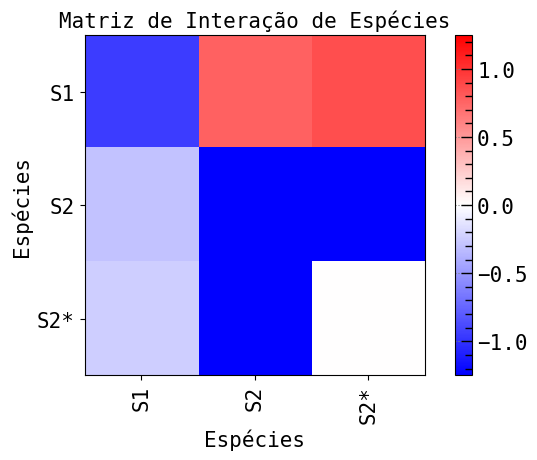

In [11]:
seed = 30302
S = 2
interaction_matrix = generate_interaction_matrix(S = S, 
                                                 method = "May", 
                                                 rho = 0.5, 
                                                 seed = seed)

plot_interaction_matrix(interaction_matrix)

- Gráfico de exemplo da matriz de interação para $S=10$ espécies usando o método Allesina-Tang:

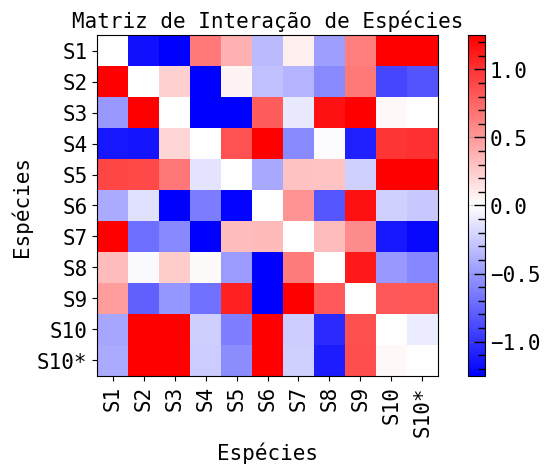

In [12]:
seed = 27386
S = 10

interaction_matrix = generate_interaction_matrix(S = S, 
                                                 method = "Allesina-Tang", 
                                                 rho = 0.5, 
                                                 seed = seed)

plot_interaction_matrix(interaction_matrix)

---

## Referências

- **[1]** *Explorando o modelo generalizado de Lotka-Volterra*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Explorando%20o%20modelo%20generalizado%20de%20Lotka-Volterra.ipynb

- **[2]** Nowak, M. A. *Evolutionary dynamics: exploring the equations of life*. Belknap Press of Harvard University Press, Cambridge, Mass., 2006. DOI: [https://doi.org/10.2307/j.ctvjghw98](https://doi.org/10.2307/j.ctvjghw98)

- **[3]** Moran, P. A. P. *Random processes in genetics*. Mathematical proceedings of the Cambridge Philosophical Society 54, **1** (1958), 60–71. DOI: [10.1017/S0305004100033193](https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/abs/random-processes-in-genetics/9EEED52D6AE22A026036F32D9B1CA07C)

- **[4]** Desai, M. M., Fisher, D. S., and Murray, A. W. *The speed of evolution and maintenance of variation in asexual populations*. Current biology 17, **5** (2007), 385–394. DOI: [10.1016/j.cub.2007.01.072](https://pubmed.ncbi.nlm.nih.gov/17331728/)

- **[5]** KIMURA, M. *Evolutionary rate at the molecular level*. Nature (London) 217, **5129** (1968), 624–626. DOI: [10.1038/217624a0](https://www.nature.com/articles/217624a0)

- **[6]** Lieberman, E., Hauert, C., and Nowak, M. A. *Evolutionary dynamics on graphs*. Nature 433, **7023** (2005), 312–316. DOI: [10.1038/nature03204](https://www.nature.com/articles/nature03204)

- **[7]** Tkadlec, J., Pavlogiannis, A., Chatterjee, K., and Nowak, M. A. *Fast and strong amplifiers of natural selection. Nature communications* 12, **1** (2021), 4009–4009. DOI: [10.1038/s41467-021-24271-w](https://www.nature.com/articles/s41467-021-24271-w).

- **[8]** MAY, R. *How many species are there on earth?* Science (American Association for the Advancement of Science) 241, **4872** (1988), 1441–1449. DOI: [10.1126/science.241.4872.1441](https://www.science.org/doi/10.1126/science.241.4872.1441).

- **[9]** Lotka, A. J. *Analytical note on certain rhythmic relations in organic systems*. Proceedings of the National Academy of Sciences 6, **7** (1920), 410–415. DOI: [10.1073/pnas.6.7.410](https://www.pnas.org/doi/10.1073/pnas.6.7.410)

- **[10]** Volterra, V. *Leçons sur la theorie mathematique de la lutte pour la vie*. Gauthier-Villars, Paris, 1931. DOI: [https://gallica.bnf.fr/ark:/12148/bpt6k29088s.image](https://gallica.bnf.fr/ark:/12148/bpt6k29088s.image)

- **[11]** Allesina, S. *A tour of the generalized lotka-volterra model*, May 2020. ICTP-SAIFR/IFT-UNESP: https://stefanoallesina.github.io/Sao_Paulo_School/

- **[12]** Hirsch, M. W. *Systems of differential equations which are competitive or cooperative: I. limit sets*. SIAM journal on mathematical analysis 13, **2** (1982), 167–179. DOI: [10.1137/0513013](https://epubs.siam.org/doi/10.1137/0513013)

- **[13]** Smale, S. *On the differential equations of species in competition*. Journal of mathematical biology 3, **1** (1976), 5–7. DOI: [10.1007/BF00307854](https://link.springer.com/article/10.1007/BF00307854)

- **[14]** MAY, R. M. *Will a large complex system be stable?* Nature (London) 238, **5364** (1972), 413–414. DOI: [10.1038/238413a0](https://www.nature.com/articles/238413a0)

- **[15]** Allesina, S., and Tang, S. *Stability criteria for complex ecosystems*. Nature (London) 483, **7388** (2012), 205–208. DOI: [10.1038/nature10832](https://www.nature.com/articles/nature10832)

- **[16]** Gillespie, D. T. *A general method for numerically simulating the stochastic time evolution of coupled chemical reactions*. Journal of computational physics 22, **4** (1976), 403–434. DOI: [10.1016/0021-9991(76)90041-3](https://www.sciencedirect.com/science/article/pii/0021999176900413)

- **[17]** Gillespie, D. T. *Exact stochastic simulation of coupled chemical reactions*. Journal of physical chemistry (1952) 81, **25** (1977), 2340–2361. [Article-Link](https://www.cmor-faculty.rice.edu/~cox/gillespie.pdf)

---